# Classify different data sets

### Basic includes

In [0]:
# Using pandas to load the csv file
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

from keras import models 
from keras import layers 
from keras import callbacks
from keras.utils import to_categorical

# reuters and fashin mnist data set from keras
from keras.datasets import reuters
from keras.datasets import fashion_mnist

# needed to preprocess text
from keras.preprocessing.text import Tokenizer

### Classify the Fashion Mnist

---

(60000, 28, 28)


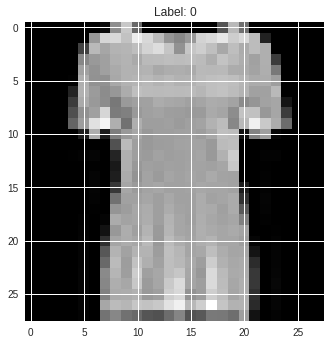

In [98]:
(fashion_train_data, fashion_train_labels), (fashion_test_data, fashion_test_labels) = fashion_mnist.load_data()

print(fashion_train_data.shape)

test_index = 10

plt.title("Label: " + str(fashion_train_labels[test_index]))
plt.imshow(fashion_train_data[test_index], cmap="gray")

#### TO DO: Preprocess the data

1. Normalize the input data set
2. Perform one hot encoding
3. Create a train, test, and validation set

In [0]:
fashion_train_data = fashion_train_data.reshape((60000, 28 * 28))
fashion_train_data = fashion_train_data.astype('float32') / 255

fashion_test_data = fashion_test_data.reshape((10000, 28 * 28)) 
fashion_test_data = fashion_test_data.astype('float32') / 255

fashion_train_labels = to_categorical(fashion_train_labels) 
fashion_test_labels = to_categorical(fashion_test_labels)

#### TO DO: Define and train a network, then plot the accuracy of the training, validation, and testing

1. Use a validation set
2. Propose and train a network
3. Print the history of the training
4. Evaluate with a test set

In [100]:
network = models.Sequential()

network.add(layers.Dense(64, activation='sigmoid', input_shape=(28 * 28,))) 
network.add(layers.Dense(32, activation='sigmoid'))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_47 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_48 (Dense)             (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [101]:
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=5)
network.compile(loss='categorical_crossentropy', 
              optimizer='rmsprop',
              metrics=['accuracy'])

history = network.fit(fashion_train_data, fashion_train_labels,
          epochs=50,
          validation_split=0.2,
          callbacks=[early_stop], 
          verbose=2)

test_loss, test_acc = network.evaluate(fashion_test_data, fashion_test_labels)

print()
print("test loss: ", test_loss, "test accuracy: ", test_acc)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
 - 4s - loss: 0.7833 - acc: 0.7617 - val_loss: 0.4673 - val_acc: 0.8359
Epoch 2/50
 - 3s - loss: 0.4315 - acc: 0.8464 - val_loss: 0.4236 - val_acc: 0.8458
Epoch 3/50
 - 3s - loss: 0.3901 - acc: 0.8592 - val_loss: 0.3808 - val_acc: 0.8612
Epoch 4/50
 - 3s - loss: 0.3649 - acc: 0.8682 - val_loss: 0.3882 - val_acc: 0.8558
Epoch 5/50
 - 3s - loss: 0.3495 - acc: 0.8745 - val_loss: 0.3659 - val_acc: 0.8672
Epoch 6/50
 - 3s - loss: 0.3358 - acc: 0.8792 - val_loss: 0.3507 - val_acc: 0.8718
Epoch 7/50
 - 3s - loss: 0.3230 - acc: 0.8843 - val_loss: 0.3519 - val_acc: 0.8741
Epoch 8/50
 - 3s - loss: 0.3133 - acc: 0.8874 - val_loss: 0.3401 - val_acc: 0.8777
Epoch 9/50
 - 3s - loss: 0.3054 - acc: 0.8893 - val_loss: 0.3529 - val_acc: 0.8789
Epoch 10/50
 - 3s - loss: 0.2971 - acc: 0.8929 - val_loss: 0.3304 - val_acc: 0.8850
Epoch 11/50
 - 3s - loss: 0.2892 - acc: 0.8951 - val_loss: 0.3385 - val_acc: 0.8829
Epoch 12/50
 - 3s - loss: 0.2837 - 

## Classifying newswires

---

Build a network to classify Reuters newswires into 46 different mutually-exclusive topics.

### Load and review the data

In [102]:
(reuters_train_data, reuters_train_labels), (reuters_test_data, reuters_test_labels) = reuters.load_data(num_words=10000)

print(reuters_train_data.shape)
print(reuters_train_labels.shape)
print(reuters_train_data[0])
print(reuters_train_labels[0])

print(set(reuters_train_labels))

(8982,)
(8982,)
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
3
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45}


Load the word index to decode the train data.

In [103]:
word_index = reuters.get_word_index()

reverse_index = dict([(value+3, key) for (key, value) in word_index.items()])

reverse_index[0] = "<PAD>"
reverse_index[1] = "<START>"
reverse_index[2] = "<UNKNOWN>"  # unknown
reverse_index[3] = "<UNUSED>"

decoded_review = ' '.join([reverse_index.get(i,'?') for i in reuters_train_data[0]])

print(decoded_review)

<START> <UNKNOWN> <UNKNOWN> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


#### TO DO: Preprocess the data

1. Normalize the input data set
2. Perform one hot encoding
3. Create a train, test, and validation set

In [0]:
tokenizer = Tokenizer(num_words=5000)
train_data_token = tokenizer.sequences_to_matrix(reuters_train_data, mode='binary')
test_data_token = tokenizer.sequences_to_matrix(reuters_test_data, mode='binary')

num_classes = 46
one_hot_train_labels = to_categorical(reuters_train_labels, num_classes)
one_hot_test_labels = to_categorical(reuters_test_labels, num_classes)

In [105]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_dim=5000))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 128)               640128    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_50 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_51 (Dense)             (None, 46)                2990      
Total params: 651,374
Trainable params: 651,374
Non-trainable params: 0
_________________________________________________________________


In [106]:
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=5)
model.compile(loss='categorical_crossentropy', 
              optimizer='rmsprop',
              metrics=['accuracy'])

history = model.fit(train_data_token, one_hot_train_labels,
          batch_size=512,
          epochs=40,
          validation_split=0.2,
          callbacks=[early_stop], 
          verbose=2)

test_loss, test_acc = model.evaluate(test_data_token, one_hot_test_labels)

print("test loss: ", test_loss, "test accuracy: ", test_acc)

Train on 7185 samples, validate on 1797 samples
Epoch 1/40
 - 2s - loss: 2.5707 - acc: 0.4466 - val_loss: 1.6775 - val_acc: 0.6383
Epoch 2/40
 - 1s - loss: 1.6056 - acc: 0.6468 - val_loss: 1.3646 - val_acc: 0.6939
Epoch 3/40
 - 1s - loss: 1.3118 - acc: 0.7076 - val_loss: 1.2169 - val_acc: 0.7318
Epoch 4/40
 - 1s - loss: 1.1140 - acc: 0.7520 - val_loss: 1.1405 - val_acc: 0.7468
Epoch 5/40
 - 1s - loss: 0.9727 - acc: 0.7825 - val_loss: 1.0472 - val_acc: 0.7730
Epoch 6/40
 - 1s - loss: 0.8599 - acc: 0.8043 - val_loss: 1.0144 - val_acc: 0.7780
Epoch 7/40
 - 1s - loss: 0.7629 - acc: 0.8263 - val_loss: 0.9838 - val_acc: 0.7880
Epoch 8/40
 - 1s - loss: 0.6774 - acc: 0.8438 - val_loss: 0.9579 - val_acc: 0.7941
Epoch 9/40
 - 1s - loss: 0.6214 - acc: 0.8571 - val_loss: 0.9825 - val_acc: 0.7874
Epoch 10/40
 - 1s - loss: 0.5662 - acc: 0.8685 - val_loss: 0.9389 - val_acc: 0.7974
Epoch 11/40
 - 1s - loss: 0.4964 - acc: 0.8841 - val_loss: 0.9359 - val_acc: 0.8002
Epoch 12/40
 - 1s - loss: 0.4589 - ac

#### TO DO: Define and train a network, then plot the accuracy of the training, validation, and testing

1. Use a validation set
2. Propose and train a network
3. Print the history of the training
4. Evaluate with a test set

## Predicting Student Admissions

---

Predict student admissions based on three pieces of data:

- GRE Scores
- GPA Scores
- Class rank

### Load and visualize the data

In [107]:
# student_data = pd.read_csv("students_data.csv")
student_data = pd.read_csv("https://raw.githubusercontent.com/DeepLearningVision-2019/a4-keras-classification-pabmacias/master/student_data.csv")
print(student_data)

     admit    gre   gpa  rank
0        0  380.0  3.61   3.0
1        1  660.0  3.67   3.0
2        1  800.0  4.00   1.0
3        1  640.0  3.19   4.0
4        0  520.0  2.93   4.0
5        1  760.0  3.00   2.0
6        1  560.0  2.98   1.0
7        0  400.0  3.08   2.0
8        1  540.0  3.39   3.0
9        0  700.0  3.92   2.0
10       0  800.0  4.00   4.0
11       0  440.0  3.22   1.0
12       1  760.0  4.00   1.0
13       0  700.0  3.08   2.0
14       1  700.0  4.00   1.0
15       0  480.0  3.44   3.0
16       0  780.0  3.87   4.0
17       0  360.0  2.56   3.0
18       0  800.0  3.75   2.0
19       1  540.0  3.81   1.0
20       0  500.0  3.17   3.0
21       1  660.0  3.63   2.0
22       0  600.0  2.82   4.0
23       0  680.0  3.19   4.0
24       1  760.0  3.35   2.0
25       1  800.0  3.66   1.0
26       1  620.0  3.61   1.0
27       1  520.0  3.74   4.0
28       1  780.0  3.22   2.0
29       0  520.0  3.29   1.0
..     ...    ...   ...   ...
370      1  540.0  3.77   2.0
371      1

Plot of the GRE and the GPA from the data.

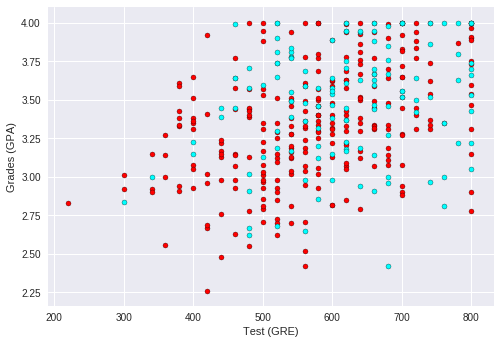

In [108]:
X = np.array(student_data[["gre","gpa"]])
y = np.array(student_data["admit"])
admitted = X[np.argwhere(y==1)]
rejected = X[np.argwhere(y==0)]
plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'cyan', edgecolor = 'k')
plt.xlabel('Test (GRE)')
plt.ylabel('Grades (GPA)')

plt.show()

Plot of the data by class rank.

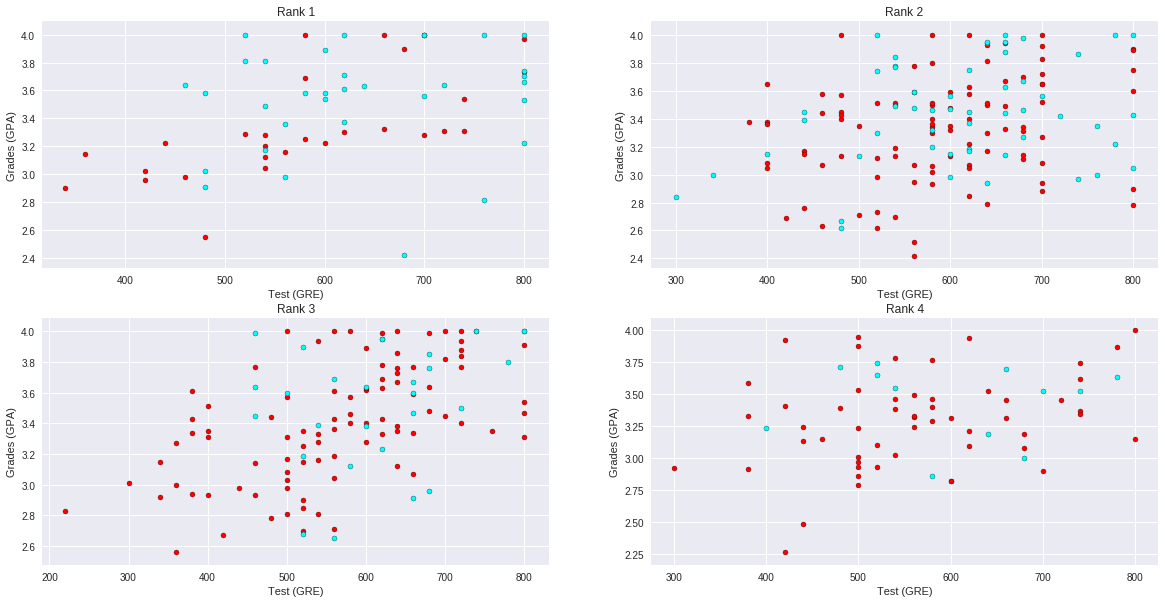

In [109]:
f, plots = plt.subplots(2, 2, figsize=(20,10))
plots = [plot for sublist in plots for plot in sublist]

for idx, plot in enumerate(plots):
    data_rank = student_data[student_data["rank"]==idx+1]
    plot.set_title("Rank " + str(idx+1))
    X = np.array(data_rank[["gre","gpa"]])
    y = np.array(data_rank["admit"])
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plot.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
    plot.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'cyan', edgecolor = 'k')
    plot.set_xlabel('Test (GRE)')
    plot.set_ylabel('Grades (GPA)')
    

#### TO DO: Preprocess the data

1. Normalize the input data set
2. Perform one hot encoding
3. Create a train, test, and validation set

In [110]:
student_data.fillna(0)

mean_gre = student_data['gre'].mean(axis = 0)
std_gre = student_data['gre'].std(axis = 0)

mean_gpa = student_data['gpa'].mean(axis = 0)
std_gpa = student_data['gpa'].std(axis = 0)

rank = np.array(student_data[["rank"]])

student_data['gre'] -= mean_gre
student_data['gre'] /= std_gre

student_data['gpa'] -= mean_gpa
student_data['gpa'] /= std_gpa

data = np.array(student_data[["gre","gpa","rank"]])
labels = np.array(student_data["admit"])

train_data = data[320:]
train_labels = labels[320:]

validate_data = data[:80]
validate_labels = labels[:80]

print(data.shape)
print(labels.shape)

(400, 3)
(400,)


In [0]:
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(256, activation='relu', input_dim=3))
  model.add(layers.Dense(256, activation='relu'))
  
  model.add(layers.Dense(1))
  
  # mean squared error
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  
  return model

In [112]:
k = 4

num_val_samples = len(train_data) // k

all_mae_histories = []
num_epochs = 500

for i in range(k):
  print("Fold:", i)
  val_data = train_data[i * num_val_samples : (i+1) * num_val_samples]
  val_labels = train_labels[i * num_val_samples : (i+1) * num_val_samples]
  
  partial_train_data = np.concatenate([train_data[:i * num_val_samples],
                                       train_data[(i+1) * num_val_samples:]], axis = 0)
  
  partial_train_labels = np.concatenate([train_labels[:i * num_val_samples],
                                       train_labels[(i+1) * num_val_samples:]], axis = 0)
  
  model = build_model()
  
  history = model.fit(partial_train_data, partial_train_labels, epochs = num_epochs,
                      validation_data = (val_data, val_labels), batch_size = 20, verbose = 0)
  
  all_mae_histories.append(history.history['val_mean_absolute_error'])
  
test_loss, test_acc = model.evaluate(validate_data, validate_labels)
print("test loss: ", test_loss, "test accuracy: ", test_acc)

Fold: 0
Fold: 1
Fold: 2
Fold: 3
80/80 [==============================] - 0s 112us/step
test loss:  0.3409411430358887 test accuracy:  0.521298861503601
